In [6]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [83]:
data = pd.read_csv("최종 전처리완료.csv")
배출량_행정동1 = pd.read_csv("평가데이터(처리)1.csv",encoding="cp949")
평가데이터1 = pd.read_csv("평가데이터1.csv").set_index("일자")

In [84]:
배출량_행정동1.describe()["배출량"].astype(int)

count       47249
mean      2179535
std       2008413
min          7050
25%        802700
50%       1521700
75%       2838550
max      13843250
Name: 배출량, dtype: int32

행정동1의 data만 가져오기

In [85]:
행정동1 = ['건입동', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동', '봉개동',
       '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면', '애월읍', '연동',
       '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '이도1동', '이도2동', '이호동',
       '일도1동', '일도2동', '정방동', '중문동', '중앙동', '천지동', '표선면', '화북동', '효돈동']

data_행정동1 = pd.concat([data[data["행정동명"] == i] for i in 행정동1],axis=0).reset_index(drop=True)
data_행정동1 = pd.merge(data_행정동1,배출량_행정동1,on = ["일자","행정동명"],how="inner")

### VIF를 통한 다중공선성 확인

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
df_every = data_행정동1.drop(["일자","년","월","일","행정시","행정동명","분기","요일", "연휴"],axis=1)
df=df_every.drop(["배출량"],axis=1)

In [104]:
#vif.sort_values(["VIF수치"],ascending=False).to_csv("VIF 수치.csv",encoding="utf-8-sig",index=False)
vif1 = pd.DataFrame()
vif1["VIF수치"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif1["features"] = df.columns
vif1

,VIF수치,features
0,9476.659898,사업체수
1,44089.217161,세대수
2,805.092617,세대당 인구
3,371.679817,남여 비율
4,5696.311551,단독주택
...,...,...
313,452.623894,연_요일별배출량비율
314,711.272173,연_요일별배출금액비율
315,99.761717,월배출건수비율
316,130.683034,월배출량비율


In [105]:
df

,사업체수,세대수,세대당 인구,남여 비율,단독주택,창고시설,제2종근린생활시설,제1종근린생활시설,공동주택,동.식물관련시설,...,월_일별배출금액비율,요일별배출건수비율,요일별배출량비율,요일별배출금액비율,연_요일별배출건수비율,연_요일별배출량비율,연_요일별배출금액비율,월배출건수비율,월배출량비율,월배출금액비율
0,849,4324,2.27,1.08,219,24,41,55,50,0,...,0.032933,0.144354,0.145655,0.146692,0.146655,0.147234,0.150515,0.075550,0.086198,0.086115
1,849,4324,2.27,1.08,219,24,41,55,50,0,...,0.035846,0.142967,0.142654,0.142534,0.141849,0.141816,0.141446,0.075550,0.086198,0.086115
2,849,4324,2.27,1.08,219,24,41,55,50,0,...,0.031941,0.138442,0.137655,0.137473,0.138770,0.137980,0.137412,0.075550,0.086198,0.086115
3,849,4324,2.27,1.08,219,24,41,55,50,0,...,0.031620,0.142927,0.141873,0.141685,0.140603,0.140079,0.139501,0.075550,0.086198,0.086115
4,849,4324,2.27,1.08,219,24,41,55,50,0,...,0.033157,0.136422,0.134419,0.134239,0.137497,0.135363,0.134804,0.075550,0.086198,0.086115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47244,355,2316,2.27,1.02,1353,395,119,122,64,3,...,0.029880,0.136769,0.137806,0.137776,0.134410,0.136973,0.136981,0.051959,0.047156,0.047369
47245,355,2316,2.27,1.02,1353,395,119,122,64,3,...,0.035068,0.151195,0.145610,0.145639,0.156566,0.148115,0.148088,0.051959,0.047156,0.047369
47246,355,2316,2.27,1.02,1353,395,119,122,64,3,...,0.034436,0.146090,0.150743,0.150825,0.142067,0.148895,0.148910,0.051959,0.047156,0.047369
47247,355,2316,2.27,1.02,1353,395,119,122,64,3,...,0.031465,0.142694,0.145045,0.145082,0.141139,0.146018,0.146033,0.051959,0.047156,0.047369


In [106]:
for col in list(df.columns):
    if len(df[col].value_counts())<2:
        print(df[col].value_counts())

## 스케일링 후 다중공선성 재확인

In [107]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df_scaled = pd.DataFrame(std.fit_transform(df))

In [108]:
vif2 = pd.DataFrame()
vif2["VIF수치"] = [variance_inflation_factor(df_scaled.values, i) for i in range(df_scaled.shape[1])]
vif2["features"] = df.columns

In [109]:
#vif.sort_values(["VIF수치"],ascending=False).to_csv("VIF 수치.csv",encoding="utf-8-sig",index=False)
vif2#.sort_values(by='VIF수치', ascending=True)

,VIF수치,features
0,19034.354972,사업체수
1,44974.066816,세대수
2,808.727149,세대당 인구
3,373.298662,남여 비율
4,14709.856417,단독주택
...,...,...
313,538.329803,연_요일별배출량비율
314,799.777519,연_요일별배출금액비율
315,100.572876,월배출건수비율
316,132.159353,월배출량비율


In [110]:
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
robustScaler.fit(df)
df_rscaled = pd.DataFrame(robustScaler.transform(df), columns=df.columns)
df_rscaled

,사업체수,세대수,세대당 인구,남여 비율,단독주택,창고시설,제2종근린생활시설,제1종근린생활시설,공동주택,동.식물관련시설,...,월_일별배출금액비율,요일별배출건수비율,요일별배출량비율,요일별배출금액비율,연_요일별배출건수비율,연_요일별배출량비율,연_요일별배출금액비율,월배출건수비율,월배출량비율,월배출금액비율
0,-0.392633,-0.233055,0.131579,0.625,-0.370277,-0.247788,-0.548387,-0.591837,-0.344595,-0.166667,...,0.034903,0.364984,0.586249,0.706440,0.575136,0.659261,1.030384,-0.357599,0.424481,0.420849
1,-0.392633,-0.233055,0.131579,0.625,-0.370277,-0.247788,-0.548387,-0.591837,-0.344595,-0.166667,...,0.884653,0.127771,0.141615,0.115147,-0.003233,-0.007987,-0.047452,-0.357599,0.424481,0.420849
2,-0.392633,-0.233055,0.131579,0.625,-0.370277,-0.247788,-0.548387,-0.591837,-0.344595,-0.166667,...,-0.254506,-0.645988,-0.598963,-0.604684,-0.373771,-0.480429,-0.526978,-0.357599,0.424481,0.420849
3,-0.392633,-0.233055,0.131579,0.625,-0.370277,-0.247788,-0.548387,-0.591837,-0.344595,-0.166667,...,-0.348120,0.120977,0.026003,-0.005661,-0.153180,-0.221870,-0.278692,-0.357599,0.424481,0.420849
4,-0.392633,-0.233055,0.131579,0.625,-0.370277,-0.247788,-0.548387,-0.591837,-0.344595,-0.166667,...,0.100298,-0.991521,-1.078521,-1.064678,-0.526909,-0.802764,-0.836894,-0.357599,0.424481,0.420849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47244,-0.836478,-0.527009,0.131579,-0.125,0.581864,0.573009,-0.045161,0.091837,-0.250000,-0.083333,...,-0.855740,-0.932193,-0.576633,-0.561594,-0.898389,-0.604409,-0.578153,-1.792149,-3.475846,-3.366720
47245,-0.836478,-0.527009,0.131579,-0.125,0.581864,0.573009,-0.045161,0.091837,-0.250000,-0.083333,...,0.657880,1.534964,0.579632,0.556663,1.767933,0.767722,0.742018,-1.792149,-3.475846,-3.366720
47246,-0.836478,-0.527009,0.131579,-0.125,0.581864,0.573009,-0.045161,0.091837,-0.250000,-0.083333,...,0.473447,0.661847,1.340178,1.294308,0.023100,0.863826,0.839695,-1.792149,-3.475846,-3.366720
47247,-0.836478,-0.527009,0.131579,-0.125,0.581864,0.573009,-0.045161,0.091837,-0.250000,-0.083333,...,-0.393432,0.081104,0.495985,0.477455,-0.088678,0.509492,0.497721,-1.792149,-3.475846,-3.366720


In [111]:
vif2_5 = pd.DataFrame()
vif2_5["VIF수치"] = [variance_inflation_factor(df_rscaled.values, i) for i in range(df_rscaled.shape[1])]
vif2_5["features"] = df.columns
vif2_5#.sort_values(by='VIF수치', ascending=True)

,VIF수치,features
0,19034.354972,사업체수
1,44974.066816,세대수
2,808.727149,세대당 인구
3,373.298662,남여 비율
4,14709.856417,단독주택
...,...,...
313,538.329803,연_요일별배출량비율
314,799.777519,연_요일별배출금액비율
315,100.572876,월배출건수비율
316,132.159353,월배출량비율


## 변수별 왜도 측정해서 가능하면 로그화

In [121]:
df1=df.copy()
loglist=[]
for val in list(df1.columns):
    if abs(df1[val].skew())>3:
        df1[val] = np.log1p(df1[val])
        loglist.append(val)  
df1=pd.DataFrame(df1)
df1

,사업체수,세대수,세대당 인구,남여 비율,단독주택,창고시설,제2종근린생활시설,제1종근린생활시설,공동주택,동.식물관련시설,...,월_일별배출금액비율,요일별배출건수비율,요일별배출량비율,요일별배출금액비율,연_요일별배출건수비율,연_요일별배출량비율,연_요일별배출금액비율,월배출건수비율,월배출량비율,월배출금액비율
0,849,4324,2.27,1.08,219,3.218876,41,55,50,0,...,0.032402,0.144354,0.145655,0.146692,0.146655,0.147234,0.150515,0.075550,0.086198,0.082607
1,849,4324,2.27,1.08,219,3.218876,41,55,50,0,...,0.035218,0.142967,0.142654,0.142534,0.141849,0.141816,0.141446,0.075550,0.086198,0.082607
2,849,4324,2.27,1.08,219,3.218876,41,55,50,0,...,0.031441,0.138442,0.137655,0.137473,0.138770,0.137980,0.137412,0.075550,0.086198,0.082607
3,849,4324,2.27,1.08,219,3.218876,41,55,50,0,...,0.031130,0.142927,0.141873,0.141685,0.140603,0.140079,0.139501,0.075550,0.086198,0.082607
4,849,4324,2.27,1.08,219,3.218876,41,55,50,0,...,0.032619,0.136422,0.134419,0.134239,0.137497,0.135363,0.134804,0.075550,0.086198,0.082607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47244,355,2316,2.27,1.02,1353,5.981414,119,122,64,3,...,0.029442,0.136769,0.137806,0.137776,0.134410,0.136973,0.136981,0.051959,0.047156,0.046282
47245,355,2316,2.27,1.02,1353,5.981414,119,122,64,3,...,0.034467,0.151195,0.145610,0.145639,0.156566,0.148115,0.148088,0.051959,0.047156,0.046282
47246,355,2316,2.27,1.02,1353,5.981414,119,122,64,3,...,0.033856,0.146090,0.150743,0.150825,0.142067,0.148895,0.148910,0.051959,0.047156,0.046282
47247,355,2316,2.27,1.02,1353,5.981414,119,122,64,3,...,0.030980,0.142694,0.145045,0.145082,0.141139,0.146018,0.146033,0.051959,0.047156,0.046282


In [122]:
df1.isnull().sum().sum()

0

In [123]:
print(loglist)

['창고시설', '관광휴게시설', '일편차', '일표준편차', '장기1거주편차', '장기1거주표준편차', '장기1일편차', '장기1일표준편차', '장기2거주편차', '장기2일편차', '장기2일표준편차', '장기2방문편차', '장기2방문표준편차', '장기3방문편차', '장기3방문표준편차', '단기1방문편차', '단기1방문표준편차', '단기2방문편차', '단기2방문표준편차', '단기3방문편차', '단기3방문표준편차', '단기4방문편차', '단기4방문표준편차', '내국인_목적별 0 기타방문', '확진자수', '일강수량', '유흥주점', '유흥단란주점', '면적당유흥주점개수', '공휴일', '연휴전날', '연휴다음날', '연말', 'PM10', '요일배달결제건수', '요일배달결제금액', '요일양식결제건수비율', '연_월결제건수_배달', '연_월결제금액_배달', '연_월양식결제건수비율', '연_월부페결제금액비율', '연평균배출량', '연배출량편차', '연평균배출금액', '연배출금액편차', '월평균배출량', '월배출량편차', '월평균배출금액', '월배출금액편차', '월평균1회배출금액', '월_일배출건수편차', '월_일평균배출량', '월_일배출량편차', '월_일평균배출금액', '월_일배출금액편차', '월_일평균1회배출금액', '요일평균배출량', '요일배출량편차', '요일평균배출금액', '요일배출금액편차', '연_요일평균배출량', '연_요일배출량편차', '연_요일평균배출금액', '연_요일배출금액편차', '연_요일평균1회배출금액', '월_일별배출금액비율', '월배출금액비율']


In [124]:
des=df1.describe()
des.loc['max', :].sum()
des

,사업체수,세대수,세대당 인구,남여 비율,단독주택,창고시설,제2종근린생활시설,제1종근린생활시설,공동주택,동.식물관련시설,...,월_일별배출금액비율,요일별배출건수비율,요일별배출량비율,요일별배출금액비율,연_요일별배출건수비율,연_요일별배출량비율,연_요일별배출금액비율,월배출건수비율,월배출량비율,월배출금액비율
count,47249.000000,47249.000000,47249.000000,47249.000000,47249.000000,47249.000000,47249.000000,47249.000000,47249.000000,47249.000000,...,47249.000000,47249.000000,47249.000000,47249.000000,47249.000000,47249.000000,47249.000000,47249.000000,47249.000000,47249.000000
mean,1562.351351,6940.444539,2.230708,1.027504,1349.729730,4.605763,184.135135,163.702703,126.270270,82.216216,...,0.032331,0.142853,0.142852,0.142853,0.142863,0.142864,0.142863,0.082295,0.082795,0.079463
std,1278.479063,5455.252378,0.254105,0.051306,1602.660783,1.959019,152.526165,154.064247,110.420186,162.903142,...,0.004445,0.006369,0.006836,0.008060,0.007173,0.007719,0.008918,0.012449,0.009690,0.011945
min,348.000000,1268.000000,1.660000,0.890000,69.000000,1.386294,31.000000,20.000000,6.000000,0.000000,...,0.001172,0.130171,0.129586,0.116871,0.125149,0.125264,0.094737,0.051959,0.047156,0.041567
25%,728.000000,2306.000000,2.060000,0.990000,313.000000,3.091042,76.000000,62.000000,37.000000,1.000000,...,0.030638,0.139224,0.138763,0.138534,0.138008,0.138075,0.137898,0.073547,0.077081,0.074074
50%,1286.000000,5916.000000,2.220000,1.030000,660.000000,4.919981,126.000000,113.000000,101.000000,6.000000,...,0.032286,0.142220,0.141698,0.141725,0.141876,0.141881,0.141845,0.081430,0.081949,0.078635
75%,1841.000000,9137.000000,2.440000,1.070000,1504.000000,6.161207,231.000000,160.000000,185.000000,37.000000,...,0.033957,0.145071,0.145513,0.145565,0.146317,0.146194,0.146312,0.089992,0.087091,0.083528
max,5666.000000,23087.000000,2.700000,1.140000,5689.000000,8.255049,566.000000,600.000000,430.000000,597.000000,...,0.205238,0.164819,0.169447,0.186208,0.171978,0.176618,0.226000,0.126924,0.116047,0.224899


In [125]:
m = (df1 == np.inf)
df2 = df.loc[m.any(axis=1), m.any(axis=0)]
df2

""


In [126]:
df1.replace([np.inf, -np.inf], np.nan)
dfdf=df1.dropna()
dfdf

,사업체수,세대수,세대당 인구,남여 비율,단독주택,창고시설,제2종근린생활시설,제1종근린생활시설,공동주택,동.식물관련시설,...,월_일별배출금액비율,요일별배출건수비율,요일별배출량비율,요일별배출금액비율,연_요일별배출건수비율,연_요일별배출량비율,연_요일별배출금액비율,월배출건수비율,월배출량비율,월배출금액비율
0,849,4324,2.27,1.08,219,3.218876,41,55,50,0,...,0.032402,0.144354,0.145655,0.146692,0.146655,0.147234,0.150515,0.075550,0.086198,0.082607
1,849,4324,2.27,1.08,219,3.218876,41,55,50,0,...,0.035218,0.142967,0.142654,0.142534,0.141849,0.141816,0.141446,0.075550,0.086198,0.082607
2,849,4324,2.27,1.08,219,3.218876,41,55,50,0,...,0.031441,0.138442,0.137655,0.137473,0.138770,0.137980,0.137412,0.075550,0.086198,0.082607
3,849,4324,2.27,1.08,219,3.218876,41,55,50,0,...,0.031130,0.142927,0.141873,0.141685,0.140603,0.140079,0.139501,0.075550,0.086198,0.082607
4,849,4324,2.27,1.08,219,3.218876,41,55,50,0,...,0.032619,0.136422,0.134419,0.134239,0.137497,0.135363,0.134804,0.075550,0.086198,0.082607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47244,355,2316,2.27,1.02,1353,5.981414,119,122,64,3,...,0.029442,0.136769,0.137806,0.137776,0.134410,0.136973,0.136981,0.051959,0.047156,0.046282
47245,355,2316,2.27,1.02,1353,5.981414,119,122,64,3,...,0.034467,0.151195,0.145610,0.145639,0.156566,0.148115,0.148088,0.051959,0.047156,0.046282
47246,355,2316,2.27,1.02,1353,5.981414,119,122,64,3,...,0.033856,0.146090,0.150743,0.150825,0.142067,0.148895,0.148910,0.051959,0.047156,0.046282
47247,355,2316,2.27,1.02,1353,5.981414,119,122,64,3,...,0.030980,0.142694,0.145045,0.145082,0.141139,0.146018,0.146033,0.051959,0.047156,0.046282


In [127]:
rows_with_inf = df1[df1.apply(lambda x: any(np.isinf(x)), axis=1)]
rows_with_inf

,사업체수,세대수,세대당 인구,남여 비율,단독주택,창고시설,제2종근린생활시설,제1종근린생활시설,공동주택,동.식물관련시설,...,월_일별배출금액비율,요일별배출건수비율,요일별배출량비율,요일별배출금액비율,연_요일별배출건수비율,연_요일별배출량비율,연_요일별배출금액비율,월배출건수비율,월배출량비율,월배출금액비율


In [128]:
df1.values

array([[8.49000000e+02, 4.32400000e+03, 2.27000000e+00, ...,
        7.55495534e-02, 8.61981134e-02, 8.26068814e-02],
       [8.49000000e+02, 4.32400000e+03, 2.27000000e+00, ...,
        7.55495534e-02, 8.61981134e-02, 8.26068814e-02],
       [8.49000000e+02, 4.32400000e+03, 2.27000000e+00, ...,
        7.55495534e-02, 8.61981134e-02, 8.26068814e-02],
       ...,
       [3.55000000e+02, 2.31600000e+03, 2.27000000e+00, ...,
        5.19588182e-02, 4.71561402e-02, 4.62815511e-02],
       [3.55000000e+02, 2.31600000e+03, 2.27000000e+00, ...,
        5.19588182e-02, 4.71561402e-02, 4.62815511e-02],
       [3.55000000e+02, 2.31600000e+03, 2.27000000e+00, ...,
        5.19588182e-02, 4.71561402e-02, 4.62815511e-02]])

In [129]:
vif3 = pd.DataFrame()
vif3["VIF수치"] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif3["features"] = df1.columns
vif3#.sort_values(by='VIF수치', ascending=True)

,VIF수치,features
0,5878.644468,사업체수
1,22642.357448,세대수
2,917.688833,세대당 인구
3,372.296549,남여 비율
4,12025.570721,단독주택
...,...,...
313,512.183256,연_요일별배출량비율
314,504.556654,연_요일별배출금액비율
315,287.830533,월배출건수비율
316,460.200843,월배출량비율


### 로그화 후 스케일링해서 또 확인

In [132]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df_scaled = pd.DataFrame(std.fit_transform(df1))

In [133]:
vif4 = pd.DataFrame()
vif4["VIF수치"] = [variance_inflation_factor(df_scaled.values, i) for i in range(df_scaled.shape[1])]
vif4["features"] = df.columns
vif4

,VIF수치,features
0,53409.706154,사업체수
1,32844.066094,세대수
2,999.368827,세대당 인구
3,374.496551,남여 비율
4,24613.081413,단독주택
...,...,...
313,573.127569,연_요일별배출량비율
314,558.987865,연_요일별배출금액비율
315,298.006785,월배출건수비율
316,471.285885,월배출량비율


In [157]:
df2=df.copy()
df2['평균 기온']=df2['평균 기온']-(df2['평균 기온'].min())
df2['최저 기온']=df2['최저 기온']-(df2['최저 기온'].min())
df2['최고 기온']=df2['최고 기온']-(df2['최고 기온'].min())

In [158]:
for val in list(df2.columns):
    df2[val] = np.log1p(df2[val])
df2=pd.DataFrame(df2)
df2

,사업체수,세대수,세대당 인구,남여 비율,단독주택,창고시설,제2종근린생활시설,제1종근린생활시설,공동주택,동.식물관련시설,...,월_일별배출금액비율,요일별배출건수비율,요일별배출량비율,요일별배출금액비율,연_요일별배출건수비율,연_요일별배출량비율,연_요일별배출금액비율,월배출건수비율,월배출량비율,월배출금액비율
0,6.745236,8.372167,1.18479,0.732368,5.393628,3.218876,3.737670,4.025352,3.931826,0.000000,...,0.032402,0.134840,0.135976,0.136881,0.136849,0.137354,0.140209,0.072832,0.082684,0.082607
1,6.745236,8.372167,1.18479,0.732368,5.393628,3.218876,3.737670,4.025352,3.931826,0.000000,...,0.035218,0.133627,0.133353,0.133249,0.132649,0.132620,0.132296,0.072832,0.082684,0.082607
2,6.745236,8.372167,1.18479,0.732368,5.393628,3.218876,3.737670,4.025352,3.931826,0.000000,...,0.031441,0.129661,0.128969,0.128809,0.129948,0.129255,0.128755,0.072832,0.082684,0.082607
3,6.745236,8.372167,1.18479,0.732368,5.393628,3.218876,3.737670,4.025352,3.931826,0.000000,...,0.031130,0.133593,0.132670,0.132505,0.131557,0.131098,0.130590,0.072832,0.082684,0.082607
4,6.745236,8.372167,1.18479,0.732368,5.393628,3.218876,3.737670,4.025352,3.931826,0.000000,...,0.032619,0.127885,0.126120,0.125962,0.128830,0.126952,0.126460,0.072832,0.082684,0.082607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47244,5.874931,7.748029,1.18479,0.703098,7.210818,5.981414,4.787492,4.812184,4.174387,1.386294,...,0.029442,0.128190,0.129102,0.129076,0.126113,0.128370,0.128377,0.050654,0.046078,0.046282
47245,5.874931,7.748029,1.18479,0.703098,7.210818,5.981414,4.787492,4.812184,4.174387,1.386294,...,0.034467,0.140801,0.135937,0.135962,0.145456,0.138121,0.138098,0.050654,0.046078,0.046282
47246,5.874931,7.748029,1.18479,0.703098,7.210818,5.981414,4.787492,4.812184,4.174387,1.386294,...,0.033856,0.136356,0.140408,0.140479,0.132840,0.138801,0.138814,0.050654,0.046078,0.046282
47247,5.874931,7.748029,1.18479,0.703098,7.210818,5.981414,4.787492,4.812184,4.174387,1.386294,...,0.030980,0.133389,0.135444,0.135476,0.132027,0.136293,0.136306,0.050654,0.046078,0.046282


In [159]:
dfdfdf=pd.DataFrame(df2.isnull().sum())
dfdfdf.reset_index(inplace=True)
for i in range(len(dfdfdf)):
    if dfdfdf.loc[i, 0]!=0:
        print(dfdfdf.loc[i, 'index'])

In [160]:
vif5 = pd.DataFrame()
vif5["전체로그변환vif"] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
vif5["features"] = df.columns
vif5

,전체로그변환vif,features
0,9.039019e+05,사업체수
1,4.916665e+07,세대수
2,1.742123e+06,세대당 인구
3,2.925080e+05,남여 비율
4,7.203993e+04,단독주택
...,...,...
313,2.176229e+06,연_요일별배출량비율
314,2.176401e+05,연_요일별배출금액비율
315,1.561609e+04,월배출건수비율
316,4.119932e+04,월배출량비율


In [161]:
vif1=vif1.rename(columns={"VIF수치":"일반vif"})
vif2=vif2.rename(columns={"VIF수치":"정규화vif"})
vif2_5=vif2_5.rename(columns={"VIF수치":"로버스트vif"})
vif3=vif3.rename(columns={"VIF수치":"로그변환vif"})
vif4=vif4.rename(columns={"VIF수치":"로그_정규화vif"})
vifs=pd.concat([vif1['features'], vif1['일반vif'], vif2['정규화vif'], vif2_5['로버스트vif'], vif3['로그변환vif'], vif4['로그_정규화vif'], vif5['전체로그변환vif']], axis=1)
vifs


,features,일반vif,정규화vif,로버스트vif,로그변환vif,로그_정규화vif,전체로그변환vif
0,사업체수,9476.659898,19034.354972,19034.354972,5878.644468,53409.706154,9.039019e+05
1,세대수,44089.217161,44974.066816,44974.066816,22642.357448,32844.066094,4.916665e+07
2,세대당 인구,805.092617,808.727149,808.727149,917.688833,999.368827,1.742123e+06
3,남여 비율,371.679817,373.298662,373.298662,372.296549,374.496551,2.925080e+05
4,단독주택,5696.311551,14709.856417,14709.856417,12025.570721,24613.081413,7.203993e+04
...,...,...,...,...,...,...,...
313,연_요일별배출량비율,452.623894,538.329803,538.329803,512.183256,573.127569,2.176229e+06
314,연_요일별배출금액비율,711.272173,799.777519,799.777519,504.556654,558.987865,2.176401e+05
315,월배출건수비율,99.761717,100.572876,100.572876,287.830533,298.006785,1.561609e+04
316,월배출량비율,130.683034,132.159353,132.159353,460.200843,471.285885,4.119932e+04


In [163]:
vifs_diff=vifs.copy()
for col in list(vifs_diff.columns):
    if col=="features" or col=="일반vif":
        continue
    else:
        vifs_diff[col]=vifs_diff['일반vif']-vifs_diff[col]
vifs_diff

,features,일반vif,정규화vif,로버스트vif,로그변환vif,로그_정규화vif,전체로그변환vif
0,사업체수,9476.659898,-9557.695073,-9557.695073,3598.015430,-43933.046256,-8.944253e+05
1,세대수,44089.217161,-884.849655,-884.849655,21446.859713,11245.151067,-4.912256e+07
2,세대당 인구,805.092617,-3.634532,-3.634532,-112.596217,-194.276210,-1.741318e+06
3,남여 비율,371.679817,-1.618846,-1.618846,-0.616732,-2.816734,-2.921363e+05
4,단독주택,5696.311551,-9013.544865,-9013.544865,-6329.259169,-18916.769862,-6.634362e+04
...,...,...,...,...,...,...,...
313,연_요일별배출량비율,452.623894,-85.705909,-85.705909,-59.559362,-120.503675,-2.175776e+06
314,연_요일별배출금액비율,711.272173,-88.505346,-88.505346,206.715519,152.284308,-2.169288e+05
315,월배출건수비율,99.761717,-0.811159,-0.811159,-188.068816,-198.245067,-1.551633e+04
316,월배출량비율,130.683034,-1.476319,-1.476319,-329.517809,-340.602851,-4.106864e+04


In [169]:
vifs_diff.isnull().sum()

features      0
일반vif         0
정규화vif       18
로버스트vif      18
로그변환vif      18
로그_정규화vif    18
전체로그변환vif     6
dtype: int64

In [173]:
for i in range(318):
    print(vifs_diff.loc[i, '전체로그변환vif'])

-894425.2839722584
-49122561.34068816
-1741318.0627455397
-292136.3008732297
-66343.62032724213
-93419.4690081877
-573498.8341266911
-735769.3476374411
-277383.5578103891
-36713.22667148956
-44696.159850640026
-3546.94690781724
-3776.535363873767
-1851.4977812285988
-2859758.954665962
-2819559.048785683
-7098.1637458868745
-5299.299998090037
1222.230240301219
-30424.25067011876
-2548.172445553564
-5995.526153379837
-29799.31136313551
-2115.9012898045735
-5076.94682348274
-616.2189710166733
-310.2109631778012
97.68379208072855
87.34043451416275
-811.1103766291405
-440.18819388206094
-132.58446590541206
-120.82618145572346
-31.357115759092615
-33.57487196324205
-196.15713658515153
-132.21806581678769
-120.15086666748348
-123.12004507031588
-38.400366951149664
-38.32768348529575
-124.43080697761503
-95.54804472613515
-555.4885969011782
-537.697600457115
-78.4227584231822
-82.64985821359346
-1199.2286344072136
-844.0851424076312
-202.98143780170997
-133.30323548867074
-101.28132187930211
-

In [ ]:
for i in range(len(vifs_diff)):
    if col=="features" or col=="일반vif":
        continue
    else:
        vifs_diff[col]=vifs_diff['일반vif']-vifs_diff[col]

In [164]:
vifs_difference=pd.DataFrame([[0]*5], columns=['정규화vif','로버스트vif', '로그변환vif', '로그_정규화vif', '전체로그변환vif'])
for col in list(vifs_difference.columns):
    if col=="features" or col=="일반vif":
        continue
    else:
        vifs_difference.loc[0, col]=vifs_diff[col].sum()
        
vifs_difference

,정규화vif,로버스트vif,로그변환vif,로그_정규화vif,전체로그변환vif
0,-inf,-inf,-inf,-inf,NaN


### OLS 검정
- p-value 확인

In [59]:
df_ols=pd.concat([df1, df_every['배출량']], axis=1)
df_ols

,사업체수,세대수,세대당 인구,남여 비율,단독주택,창고시설,제2종근린생활시설,제1종근린생활시설,공동주택,동.식물관련시설,...,요일별배출건수비율,요일별배출량비율,요일별배출금액비율,연_요일별배출건수비율,연_요일별배출량비율,연_요일별배출금액비율,월배출건수비율,월배출량비율,월배출금액비율,배출량
0,849,4324,2.27,1.08,219,3.178054,41,55,50,0,...,0.144354,0.145655,0.146692,0.146655,0.147234,0.150515,0.075550,0.086198,-2.452075,1708250
1,849,4324,2.27,1.08,219,3.178054,41,55,50,0,...,0.142967,0.142654,0.142534,0.141849,0.141816,0.141446,0.075550,0.086198,-2.452075,1841150
2,849,4324,2.27,1.08,219,3.178054,41,55,50,0,...,0.138442,0.137655,0.137473,0.138770,0.137980,0.137412,0.075550,0.086198,-2.452075,1411450
3,849,4324,2.27,1.08,219,3.178054,41,55,50,0,...,0.142927,0.141873,0.141685,0.140603,0.140079,0.139501,0.075550,0.086198,-2.452075,1558700
4,849,4324,2.27,1.08,219,3.178054,41,55,50,0,...,0.136422,0.134419,0.134239,0.137497,0.135363,0.134804,0.075550,0.086198,-2.452075,1338350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47244,355,2316,2.27,1.02,1353,5.978886,119,122,64,3,...,0.136769,0.137806,0.137776,0.134410,0.136973,0.136981,0.051959,0.047156,-3.049782,853350
47245,355,2316,2.27,1.02,1353,5.978886,119,122,64,3,...,0.151195,0.145610,0.145639,0.156566,0.148115,0.148088,0.051959,0.047156,-3.049782,992150
47246,355,2316,2.27,1.02,1353,5.978886,119,122,64,3,...,0.146090,0.150743,0.150825,0.142067,0.148895,0.148910,0.051959,0.047156,-3.049782,956900
47247,355,2316,2.27,1.02,1353,5.978886,119,122,64,3,...,0.142694,0.145045,0.145082,0.141139,0.146018,0.146033,0.051959,0.047156,-3.049782,900500


In [61]:
x_train,x_test,y_train,y_test = train_test_split(df_ols.drop(["배출량"],axis=1),
                                                 df_ols["배출량"],test_size=0.2,random_state=0)

In [62]:
import statsmodels.api as sm
full_model = sm.OLS(y_train,x_train)
fitted_full_model = full_model.fit()
fitted_full_model.summary()

LinAlgError: SVD did not converge

### OLS 검정과 VIF 수치를 이용해 동시에 피쳐 선택
- ols_검정_col 에는 p-value가 0.4가 넘는 피쳐들이 들어있음. VIF 수치도 확인해봐야하는 후보군
- vif_ols_검정_col 에는 p-value가 0.4 넘는 피쳐들의 vif 수치

In [ ]:
ols_검정 = pd.read_csv("OLS 검정.csv")
ols_검정_col = ols_검정[ols_검정["p-value"] > 0.4]["컬럼"]

In [ ]:
vif_col = []
for col in ols_검정_col:
    vif_col.append(vif[vif["features"] == col])
vif_ols_검정_col = pd.concat(vif_col,axis=0)
vif_ols_검정_col["VIF수치"] = vif_ols_검정_col["VIF수치"].apply(lambda x : round(x,3))

In [ ]:
vif_ols_검정_col

## 군집 나누고 나서 VIF 검증 혹은 OLS 검정
- 행정동1_label : 행정동1의 label 정보
- 행정동1_label0 : 행정동1의 군집 0 행정동명
- data_행정동1_label0 : 행정동1의 군집 0의 data

In [ ]:
행정동1_label = pd.read_csv("행정동1 군집화 label5.csv")
행정동1_label0 = 행정동1_label[행정동1_label["label"] == 0]["행정동명"]

data_행정동1_label0 = pd.concat([data[data["행정동명"] == i] for i in 행정동1_label0],axis=0,ignore_index=True)

행정동1 label 0의 VIF 확인

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df = data_행정동1_label0.drop(["일자","행정시","행정동명"],axis=1)
df =  pd.get_dummies(df,columns = ["년","월","일","요일","분기"])
vif_label0 = pd.DataFrame()
vif_label0["VIF수치"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif_label0["features"] = df.columns

vif_label0["VIF수치"] = vif_label0["VIF수치"].apply(lambda x : round(x,3))
vif_label0 = vif_label0.sort_values("VIF수치")

In [ ]:
vif_label0_검정_col = vif_label0[vif_label0["VIF수치"] > 10]["features"]

In [ ]:
vif_label0_검정_col

행정동1 label 0의 OLS 검정

In [ ]:
dfX = pd.merge(data_행정동1_label0,배출량_행정동1,on = ["일자","행정동명"],how="inner")
Y = dfX["배출량"]
dfX = dfX.drop(["일자","행정시","배출량"],axis=1)
dfX =  pd.get_dummies(dfX,columns = ["년","월","일","요일","분기","행정동명"])

x_train,x_test,y_train,y_test = train_test_split(dfX.drop(["배출량"],axis=1),Y,test_size=0.2,random_state=0)

In [ ]:
dfX

In [ ]:
import statsmodels.api as sm
full_model = sm.OLS(y_train,x_train)
fitted_full_model = full_model.fit()
fitted_full_model.summary()

In [171]:
ols_label0 = pd.read_csv("label0 OLS 검정.csv")

ols_label0_검정_col = ols_label0[ols_label0["p-value"] > 0.05]["features"]

label0에 대해서 VIF와 OLS 동시에 검정하기
- ols_vif_label0 : label0의 VIF 와 p-value 결합 데이터프레임
- label0_drop_col : VIF > 10 & p-value > 0.05 인 컬럼

In [184]:
ols_vif_label0 = pd.merge(ols_label0,vif_label0,on="features",how="inner")
label0_drop_col = ols_vif_label0[(ols_vif_label0["p-value"] > 0.05) & (ols_vif_label0["VIF수치"] > 10)]

In [185]:
label0_drop_col.to_csv("label0_drop_col.csv",encoding="utf-8-sig",index=False)

VIF OLS 검정해서 drop하면 성능이 어떨까?
- 큰 차이가 없네..

In [193]:
dfX_drop = dfX.drop(label0_drop_col["features"].values,axis=1)
# Y는 배출량

drop한 성능

In [227]:
x_train,x_test,y_train,y_test = train_test_split(dfX_drop.values,Y,test_size=0.2,random_state=0)
lgbm_reg = LGBMRegressor(n_estimators=500)
model = lgbm_reg
model.fit(x_train,y_train)
pred = model.predict(x_test)

rmsle_val,rmse_val,mae_val = eval_reg(y_test,pred)
print(" - - - - - -- - - - - - - -")
print("RMSLE : {0:.3f}, RMSE : {1:.3f}, MAE : {2:.3f}".format(rmsle_val,rmse_val,mae_val))

 - - - - - -- - - - - - - -
RMSLE : 0.032, RMSE : 25758.084, MAE : 4667.887


drop 안한 원본 성능

In [95]:
dfX = pd.merge(data_행정동1_label0,배출량_행정동1,on = ["일자","행정동명"],how="inner")
Y = dfX["배출량"]
dfX = dfX.drop(["일자","행정시","배출량"],axis=1)
dfX =  pd.get_dummies(dfX,columns = ["년","월","일","요일","분기","행정동명"])

x_train,x_test,y_train,y_test = train_test_split(dfX.values,Y,test_size=0.2,random_state=0)
lgbm_reg = LGBMRegressor(n_estimators=500)
model = lgbm_reg
model.fit(x_train,y_train)
pred = model.predict(x_test)

rmsle_val,rmse_val,mae_val = eval_reg(y_test,pred)
print(" - - - - - -- - - - - - - -")
print("RMSLE : {0:.3f}, RMSE : {1:.3f}, MAE : {2:.3f}".format(rmsle_val,rmse_val,mae_val))

 - - - - - -- - - - - - - -
RMSLE : 0.102, RMSE : 134877.673, MAE : 100686.488


이상치 대체한 뒤에 label0 예측해보기

In [98]:
Y_df = pd.DataFrame(Y,columns=["배출량"])
Y_df["배출량"] = replace_outlier_zscore(Y_df,"배출량",2)

drop안하고 이상치 대체

In [99]:
x_train,x_test,y_train,y_test = train_test_split(dfX.values,Y_df["배출량"],test_size=0.2,random_state=0)
lgbm_reg = LGBMRegressor(n_estimators=500)
model = lgbm_reg
model.fit(x_train,y_train)
pred = model.predict(x_test)

rmsle_val,rmse_val,mae_val = eval_reg(y_test,pred)
print(" - - - - - -- - - - - - - -")
print("RMSLE : {0:.3f}, RMSE : {1:.3f}, MAE : {2:.3f}".format(rmsle_val,rmse_val,mae_val))

 - - - - - -- - - - - - - -
RMSLE : 0.084, RMSE : 127938.291, MAE : 96790.575


drop하고 이상치 대체

In [244]:
x_train,x_test,y_train,y_test = train_test_split(dfX_drop.values,Y_df["배출량"],test_size=0.2,random_state=0)
lgbm_reg = LGBMRegressor(n_estimators=500)
model = lgbm_reg
model.fit(x_train,y_train)
pred = model.predict(x_test)

rmsle_val,rmse_val,mae_val = eval_reg(y_test,pred)
print(" - - - - - -- - - - - - - -")
print("RMSLE : {0:.3f}, RMSE : {1:.3f}, MAE : {2:.3f}".format(rmsle_val,rmse_val,mae_val))

 - - - - - -- - - - - - - -
RMSLE : 0.013, RMSE : 7310.410, MAE : 3087.603


0        1708250
1        1841150
2        1411450
3        1558700
4        1338350
          ...   
16596    1652650
16597    2341500
16598    2057300
16599    1911750
16600    1829900
Name: 배출량, Length: 16601, dtype: int64

## 행정동1 label0에 대해 drop 테스트 시릿

In [ ]:
def 피처_drop해보기(col,X,Y):
    rmse_drop = "False"
    mae_drop = "False"
    X = X.drop([col],axis=1)
    x_train,x_test,y_train,y_test = train_test_split(X.values,Y,test_size=0.1,random_state=0)

    lgbm_reg = LGBMRegressor(n_estimators=100)
    model = lgbm_reg
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    print("drop 한 피처 : ",col)
    rmsle_val,rmse_val,mae_val = eval_reg(y_test,pred)
    print(" - - - - - -- - - - - - - -")
    print("RMSLE : {0:.3f}, RMSE : {1:.3f}, MAE : {2:.3f}".format(rmsle_val,rmse_val,mae_val))
    if (rmse_val-228837.300) > 0:
        print("RMSE 성능 상승", round(rmse_val-228837.300,3))
        rmse_drop = "True"
    if (mae_val-149857.389) > 0:
        print("MAE 성능 상승 : ",round(mae_val-149857.389,3))
        mae_drop = "True"
    return rmse_drop,mae_drop

In [ ]:
#vif.to_csv("VIF 수치.csv",encoding="utf-8-sig",index=False)

## 이상치 대체하기
- 평가데이터1 -> 평가데이터1_대체

In [97]:
def replace_outlier_zscore(df,columns,n):
    data = df.copy()
    mean = np.mean(data[columns])
    std = np.std(data[columns])
    score_top = int(n)*std + mean
    score_bot = -1*n*std + mean
    
    def cond1(x):
        if x > score_top:
            return score_top
        if x < score_bot:
            return score_bot
        else:
            return x
    data[columns] = data[columns].apply(cond1)
    return data[columns]

In [ ]:
행정동1 = ['건입동', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동', '봉개동',
       '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면', '애월읍', '연동',
       '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '이도1동', '이도2동', '이호동',
       '일도1동', '일도2동', '정방동', '중문동', '중앙동', '천지동', '표선면', '화북동', '효돈동']

In [ ]:
배출량_행정동1_대체 = 배출량_행정동1.copy()
for col in 행정동1:
    배출량_행정동1_대체[col] = replace_outlier_zscore(배출량_행정동1,col)

In [ ]:
#평가데이터1_대체.to_csv("평가데이터1 이상치대체.csv",encoding="utf-8-sig",index=False)

## 행정동 군집별로 예측
- 군집 5개 정보 : 행정동1 군집화 label5.csv
- 4번 군집에는 성산읍, 애월읍, 대정읍
- 이상치 한번 조정해보기

In [114]:
행정동1_군집label = pd.read_csv("행정동1 군집화 label5.csv")
label5 = 평가데이터1[["성산읍","일도2동","대정읍"]]

<AxesSubplot:xlabel='일자'>

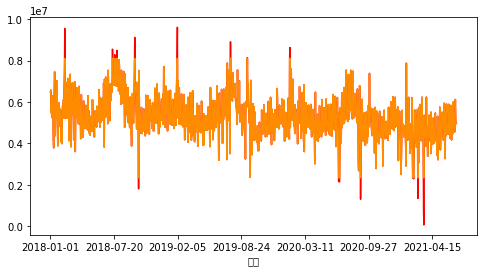

In [118]:
fig,ax = plt.subplots(1,1,figsize=(8,4))
label5["일도2동"].plot(ax=ax,color="red")
replace_outlier_zscore(label5,"일도2동",3).plot(ax=ax,color="darkorange",linestyle = '-')

### Q. 이상치를 대체하면 성능이 좋아질까?
- 이상치 z-score 2로 대체해보자

In [79]:
평가데이터1_이상치대체 = 평가데이터1.copy()
for col in 평가데이터1.columns:
    평가데이터1_이상치대체[col] = replace_outlier_zscore(평가데이터1,col,2)
label4 = ["성산읍","애월읍","대정읍"]

,건입동,남원읍,노형동,대륜동,대정읍,대천동,도두동,동홍동,봉개동,삼도1동,...,이호동,일도1동,일도2동,정방동,중문동,중앙동,천지동,표선면,화북동,효돈동
일자,,,,,,,,,,,,,,,,,,,,,
2018-01-01,1708250.0,1239600.0,9357900.0,1717700.0,1264950.0,1765600.0,613300.000000,4165050.0,395300.0,2556750.0,...,625550.000000,718950.0000,6478450.0,1025900.0,1699100.0,1384300.0,1133000.0,4.528500e+05,4728700.0,444650.0
2018-01-02,1841150.0,1569850.0,10152950.0,2121750.0,1278200.0,2148050.0,748400.000000,4361400.0,356300.0,2724050.0,...,801050.000000,678450.0000,6574000.0,967650.0,1847400.0,1794650.0,1268450.0,3.660500e+05,4374000.0,822950.0
2018-01-03,1411450.0,1405650.0,8899800.0,1920300.0,1284450.0,2061650.0,538000.000000,4028450.0,300400.0,2333350.0,...,498400.000000,657850.0000,5490000.0,921250.0,1577550.0,1799100.0,1242400.0,5.116000e+05,3691250.0,577200.0
2018-01-04,1558700.0,1390250.0,9141400.0,1710000.0,1070000.0,1735000.0,444450.000000,3725450.0,483350.0,2503300.0,...,643350.000000,693850.0000,5922250.0,813300.0,1699900.0,1611050.0,1085600.0,3.666000e+05,3729850.0,584850.0
2018-01-05,1338350.0,1585700.0,8024400.0,1803600.0,1242000.0,1978850.0,333800.000000,4205100.0,265300.0,2238050.0,...,481350.000000,682950.0000,5250150.0,860550.0,1744100.0,1839150.0,1396200.0,4.205000e+05,3342200.0,669700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,1482150.0,1948850.0,7835650.0,1711650.0,3798350.0,1753950.0,685500.000000,3434800.0,538300.0,2217450.0,...,722700.000000,650116.0214,5137500.0,858300.0,2558150.0,1348400.0,1137500.0,1.503900e+06,3787050.0,853350.0
2021-06-27,1446550.0,2292900.0,9172600.0,1896400.0,3541700.0,2182150.0,849843.141278,3748200.0,579250.0,2177350.0,...,774750.000000,688907.6667,6119700.0,877000.0,2510250.0,1161200.0,1056550.0,1.482800e+06,4199000.0,992150.0
2021-06-28,1323550.0,2191650.0,8274150.0,1879450.0,3623300.0,2171950.0,604050.000000,3595350.0,599500.0,1917150.0,...,772750.000000,670887.8560,5128300.0,880050.0,2411600.0,1333700.0,1098450.0,1.563923e+06,3903950.0,956900.0


### Q. 군집화 해서 예측하면 성능이 좋아질까?
- 군집 5개로 나눠보자
- 군집 4는 행정동 개수가 3개라서 그런지 좋은 성능이 안 나옴

5개 군집화 시, 군집 4번에 대한 예측

In [12]:
행정동1_군집label = pd.read_csv("행정동1 군집화 label5.csv")

In [111]:
행정동1_군집label["label"].value_counts()

0    13
3    12
2     5
1     4
4     3
Name: label, dtype: int64

In [16]:
label0 = 행정동1_군집label[행정동1_군집label["label"] == 0]["행정동명"].values
label1 = 행정동1_군집label[행정동1_군집label["label"] == 1]["행정동명"].values
label2 = 행정동1_군집label[행정동1_군집label["label"] == 2]["행정동명"].values
label3 = 행정동1_군집label[행정동1_군집label["label"] == 3]["행정동명"].values
label4 = 행정동1_군집label[행정동1_군집label["label"] == 4]["행정동명"].values

In [132]:
def get_label예측(행정동리스트):
    data_행정동1_label4 = pd.concat([data_행정동1[data_행정동1["행정동명"] == i] for i in 행정동리스트],axis=0).reset_index(drop=True)
    Y = data_행정동1_label4["배출량"]
    #Y = np.log1p(Y)

    X = data_행정동1_label4.drop(["일자","행정시","배출량"],axis=1).reset_index(drop=True)
    X = pd.get_dummies(X,columns = ["년","월","일","요일","분기","행정동명"])
    X_drop = X.drop(label0_drop_col["features"].values,axis=1)
    
    x_train,x_test,y_train,y_test = train_test_split(X_drop.values,Y,test_size=0.2,random_state=0)
    lgbm_reg = LGBMRegressor(n_estimators=500)
    model = lgbm_reg
    model.fit(x_train,y_train)
    pred = model.predict(x_test)

    rmsle_val,rmse_val,mae_val = eval_reg(y_test,pred)
    print(" - - - - - -- - - - - - - -")
    print("RMSLE : {0:.3f}, RMSE : {1:.3f}, MAE : {2:.3f}".format(rmsle_val,rmse_val,mae_val))

In [133]:
print("5개로 군집화 시, 군집 0번에 대한 예측성능",get_label예측(label0))
print("5개로 군집화 시, 군집 1번에 대한 예측성능",get_label예측(label1))
print("5개로 군집화 시, 군집 2번에 대한 예측성능",get_label예측(label2))
print("5개로 군집화 시, 군집 3번에 대한 예측성능",get_label예측(label3))
print("5개로 군집화 시, 군집 4번에 대한 예측성능",get_label예측(label4))

 - - - - - -- - - - - - - -
RMSLE : 0.099, RMSE : 135159.139, MAE : 100745.422
5개로 군집화 시, 군집 0번에 대한 예측성능 None
 - - - - - -- - - - - - - -
RMSLE : 0.093, RMSE : 426290.190, MAE : 297471.814
5개로 군집화 시, 군집 1번에 대한 예측성능 None
 - - - - - -- - - - - - - -
RMSLE : 0.080, RMSE : 247521.926, MAE : 181403.306
5개로 군집화 시, 군집 2번에 대한 예측성능 None
 - - - - - -- - - - - - - -
RMSLE : 0.161, RMSE : 92468.006, MAE : 68363.901
5개로 군집화 시, 군집 3번에 대한 예측성능 None
 - - - - - -- - - - - - - -
RMSLE : 0.158, RMSE : 231329.094, MAE : 152735.557
5개로 군집화 시, 군집 4번에 대한 예측성능 None


3개로 군집화 시,

In [104]:
행정동1_군집3개label = pd.read_csv("행정동1 군집화 label3.csv")

label0_3 = 행정동1_군집3개label[행정동1_군집3개label["label"] == 0]["행정동명"].values
label1_3 = 행정동1_군집3개label[행정동1_군집3개label["label"] == 1]["행정동명"].values
label2_3 = 행정동1_군집3개label[행정동1_군집3개label["label"] == 2]["행정동명"].values

In [106]:
print("3개로 군집화 시, 군집 0번에 대한 예측성능",get_label예측(label0_3))
print("3개로 군집화 시, 군집 1번에 대한 예측성능",get_label예측(label1_3))
print("3개로 군집화 시, 군집 2번에 대한 예측성능",get_label예측(label2_3))

 - - - - - -- - - - - - - -
RMSLE : 0.139, RMSE : 119450.673, MAE : 85223.470
3개로 군집화 시, 군집 0번에 대한 예측성능 None
 - - - - - -- - - - - - - -
RMSLE : 0.090, RMSE : 443352.381, MAE : 299774.846
3개로 군집화 시, 군집 1번에 대한 예측성능 None
 - - - - - -- - - - - - - -
RMSLE : 0.102, RMSE : 263391.284, MAE : 186866.376
3개로 군집화 시, 군집 2번에 대한 예측성능 None


In [131]:
행정동1_군집3개label["label"].value_counts()

0    27
2     6
1     4
Name: label, dtype: int64

K 민즈 군집 4개짜리 예측
- K민즈 label4.csv

In [148]:
K민즈행정동1_군집4개label = pd.read_csv("K민즈 label4.csv")

label0_4 = K민즈행정동1_군집4개label[K민즈행정동1_군집4개label["label"] == 0]["행정동명"].values
label1_4 = K민즈행정동1_군집4개label[K민즈행정동1_군집4개label["label"] == 1]["행정동명"].values
label2_4 = K민즈행정동1_군집4개label[K민즈행정동1_군집4개label["label"] == 2]["행정동명"].values
label3_4 = K민즈행정동1_군집4개label[K민즈행정동1_군집4개label["label"] == 3]["행정동명"].values

In [149]:
print("4개로 군집화 시, 군집 0번에 대한 예측성능",get_label예측(label0_4))
print("4개로 군집화 시, 군집 1번에 대한 예측성능",get_label예측(label1_4))
print("4개로 군집화 시, 군집 2번에 대한 예측성능",get_label예측(label2_4))
print("4개로 군집화 시, 군집 3번에 대한 예측성능",get_label예측(label3_4))

 - - - - - -- - - - - - - -
RMSLE : 0.112, RMSE : 152475.242, MAE : 111369.504
4개로 군집화 시, 군집 0번에 대한 예측성능 None
 - - - - - -- - - - - - - -
RMSLE : 0.081, RMSE : 511753.283, MAE : 364455.958
4개로 군집화 시, 군집 1번에 대한 예측성능 None
 - - - - - -- - - - - - - -
RMSLE : 0.083, RMSE : 264757.034, MAE : 185453.822
4개로 군집화 시, 군집 2번에 대한 예측성능 None
 - - - - - -- - - - - - - -
RMSLE : 0.183, RMSE : 92872.526, MAE : 68483.400
4개로 군집화 시, 군집 3번에 대한 예측성능 None


## 변수 선택 방법

상수항 추가해주기
- 상수항 : constant

In [172]:
label0_X = X
label0_Y = Y
# 행정동1 label0의 데이터

# bias를 위한 상수항 추가
label0_X = sm.add_constant(label0_X, has_constant = "add")
label0_X.head(3)

,const,사업체수,세대수,세대당 인구,남여 비율,단독주택,창고시설,제2종근린생활시설,제1종근린생활시설,공동주택,...,행정동명_대천동,행정동명_삼도1동,행정동명_삼도2동,행정동명_서홍동,행정동명_오라동,행정동명_용담1동,행정동명_용담2동,행정동명_이도1동,행정동명_중문동,행정동명_중앙동
0,1.0,849,4324,2.27,1.08,219,24,41,55,50,...,0,0,0,0,0,0,0,0,0,0
1,1.0,849,4324,2.27,1.08,219,24,41,55,50,...,0,0,0,0,0,0,0,0,0,0
2,1.0,849,4324,2.27,1.08,219,24,41,55,50,...,0,0,0,0,0,0,0,0,0,0


In [177]:
import time
import itertools 


processSubset 함수
- 선택한 변수를 모델에 돌려서 AIC 성능을 추출하는 함수

In [164]:
def processSubset(X,y,feature_set):
    model = sm.OLS(y,X[list(feature_set)]) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : round(AIC,3)}
    
print(processSubset(X = label0_X, y = label0_Y, feature_set = label0_X.columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002389AE727F0>, 'AIC': 15677.054}


get_best 함수
- 가장 낮은 AIC를 가지는 모델을 선택하고 저장하는 함수

In [178]:
import time
import itertools 
def getBest(X,y,k):
    tic = time.time()      # 시작 시간
    results = []           # combo별 모델 성능 결과 저장 공간
    for combo in itertools.combinations(label0_X.columns.difference(['const']),k) :
        # 각 변수 조합을 고려한 경우의수 == combo
        
        combo = (list(combo)+['const'])
        # 상수항을 추가하여 combo를 결성
        
        results.append(processSubset(X,y,feature_set = combo)) # 모델링된것을 저장
        # 만약 k=2이면 여기서 두가지 변수만 뽑아서 경우의 수를 분석하여 저장 후 AIC가 가장 낮은 모델을 선택

    models = pd.DataFrame(results) # 데이터프레임으로 모델결과 변환
    best_model = models.loc[models['AIC'].argmin()] # argmin은 최소값의 인덱스를 뽑는 함수
    toc = time.time()       # 종료 시간
    print("Processed", models.shape[0], "models on", k, "predictors in",(toc - tic),"seconds.")
    
    return best_model

forward 함수
- 전진선택방법

In [170]:
def forward(X,y,predictors):
    # predictor - 현재 선택되어있는 변수
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    # predictors에 없으면 추가해주기
    no_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    # no_predictors 에 있는 변수들 하나씩만 추가한 모델 results에 추가하기
    for p in no_predictors :
    	results.append(processSubset(X,y,predictors+[p]+['const']))
    
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ",models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print("Selected predictors:",best_model["model"].model.exog_names,"AIC: ",best_model[0])
    return best_model

전진선택법 모델

In [179]:
def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    
    # 변수 1~10개 : 0-9 -> 1-10
    for i in range(1,len(X,columns.difference(['const']))+1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if (i > 1) :
            if Forward_result["AIC"] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:",(toc-tic), "seconds.")
    
    return (Fmodels['model'][len(Fmodels['model'])])

In [ ]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns = ["AIC","model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors + ['const'])['AIC']
    
    # 변수 1~10개 0-9 -> 1-10
    for i in range(1,len(X.columns.difference(['const']))+1) :
        Forward_result = forward(X=X,y=y,predictors = predictors) # constant added
        print('forward')
        predictors = Stepmodels.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        Backward_result = backward(X=X,y=y,predictors = predictors)
        if Backward_result["AIC"] < Forward_result["AIC"]
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [k for k in predictors k != "const"]
            print('backward')
        if Stepmodels.loc[i]["AIC"] > Smodel_before:
            break
        else :
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:",(toc-tic),"seconds.")
    return (Stepmodels["model"][len(Stepmodels["model"])])

In [93]:
label1

array(['일도2동', '이도2동', '연동', '노형동'], dtype=object)

피쳐 drop
- RMSLE : 0.099, RMSE : 135159.139, MAE : 100745.422

In [137]:
label0_drop_col = pd.read_csv("VIF 수치.csv")
label0_drop_col = label0_drop_col[label0_drop_col["P>|t|"] > 0.05]["Unnamed: 0"]

In [157]:
data_ = pd.concat([data_행정동1[data_행정동1["행정동명"] == i] for i in label0],axis=0).reset_index(drop=True)
Y = data_["배출량"] / 1000000

label0_drop_col = pd.read_csv("label0_drop_col.csv")

X = data_.drop(["일자","행정시","배출량"],axis=1).reset_index(drop=True)
X = pd.get_dummies(X,columns = ["년","월","일","요일","분기","행정동명"])

X_drop = X.drop(label0_drop_col["features"].values,axis=1)

x_train,x_test,y_train,y_test = train_test_split(X_drop.values,Y,test_size=0.2,random_state=0)

lgbm_reg = LGBMRegressor(n_estimators=500)
model = lgbm_reg
model.fit(x_train,y_train)
pred = model.predict(x_test)

rmsle_val,rmse_val,mae_val = eval_reg(y_test,pred)
print(" - - - - - -- - - - - - - -")
print("RMSLE : {0:.3f}, RMSE : {1:.3f}, MAE : {2:.3f}".format(rmsle_val,rmse_val,mae_val))

 - - - - - -- - - - - - - -
RMSLE : 0.052, RMSE : 0.135, MAE : 0.101


피쳐 no drop
- RMSLE : 0.102, RMSE : 134877.673, MAE : 100686.488

In [92]:
data_ = pd.concat([data_행정동1[data_행정동1["행정동명"] == i] for i in label0],axis=0).reset_index(drop=True)
Y = data_["배출량"]

X = data_.drop(["일자","행정시","배출량"],axis=1).reset_index(drop=True)
X = pd.get_dummies(X,columns = ["년","월","일","요일","분기","행정동명"])

x_train,x_test,y_train,y_test = train_test_split(X.values,Y,test_size=0.2,random_state=0)

lgbm_reg = LGBMRegressor(n_estimators=500)
model = lgbm_reg
model.fit(x_train,y_train)
pred = model.predict(x_test)

rmsle_val,rmse_val,mae_val = eval_reg(y_test,pred)
print(" - - - - - -- - - - - - - -")
print("RMSLE : {0:.3f}, RMSE : {1:.3f}, MAE : {2:.3f}".format(rmsle_val,rmse_val,mae_val))

 - - - - - -- - - - - - - -
RMSLE : 0.102, RMSE : 134877.673, MAE : 100686.488


 - - - - - -- - - - - - - -
RMSLE : 0.102, RMSE : 134877.673, MAE : 100686.488


In [5]:
data_행정동1_label4

,일자,년,월,행정시,행정동명,사업체수,세대수,세대당 인구,남여 비율,단독주택,...,요일별배출량비율,요일별배출금액비율,연_요일별배출건수비율,연_요일별배출량비율,연_요일별배출금액비율,월배출건수비율,월배출량비율,월배출금액비율,분기,배출량
0,2018-01-01,2018,1,서귀포시,성산읍,1841,7562,2.03,1.09,4982,...,0.148243,0.148729,0.164423,0.167624,0.167633,0.066322,0.070354,0.070283,1,424100
1,2018-01-02,2018,1,서귀포시,성산읍,1841,7562,2.03,1.09,4982,...,0.140184,0.140604,0.134971,0.133677,0.133673,0.066322,0.070354,0.070283,1,442000
2,2018-01-03,2018,1,서귀포시,성산읍,1841,7562,2.03,1.09,4982,...,0.138777,0.138763,0.149180,0.148499,0.148495,0.066322,0.070354,0.070283,1,291650
3,2018-01-04,2018,1,서귀포시,성산읍,1841,7562,2.03,1.09,4982,...,0.138739,0.137874,0.134570,0.132387,0.132383,0.066322,0.070354,0.070283,1,449000
4,2018-01-05,2018,1,서귀포시,성산읍,1841,7562,2.03,1.09,4982,...,0.143962,0.143999,0.153429,0.153217,0.153217,0.066322,0.070354,0.070283,1,358450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826,2021-06-26,2021,6,서귀포시,대정읍,2016,10523,2.09,0.95,5382,...,0.142519,0.142491,0.138427,0.141335,0.141326,0.089125,0.087487,0.087582,2,3798350
3827,2021-06-27,2021,6,서귀포시,대정읍,2016,10523,2.09,0.95,5382,...,0.146176,0.146174,0.152844,0.153551,0.153517,0.089125,0.087487,0.087582,2,3541700
3828,2021-06-28,2021,6,서귀포시,대정읍,2016,10523,2.09,0.95,5382,...,0.146337,0.146357,0.146401,0.146636,0.146706,0.089125,0.087487,0.087582,2,3623300
3829,2021-06-29,2021,6,서귀포시,대정읍,2016,10523,2.09,0.95,5382,...,0.141991,0.141986,0.138279,0.136725,0.136722,0.089125,0.087487,0.087582,2,3460250


 - - - - - -- - - - - - - -
RMSLE : 0.128, RMSE : 2.203, MAE : 1.513


In [121]:
data_행정동1 = data_행정동1.sort_values("일자").reset_index(drop=True)

In [122]:
data_행정동1[(data_행정동1["일자"] == "2021-06-01") & (data_행정동1["행정동명"] == "건입동")]

,일자,년,월,행정시,행정동명,사업체수,세대수,세대당 인구,남여 비율,단독주택,...,요일별배출량비율,요일별배출금액비율,연_요일별배출건수비율,연_요일별배출량비율,연_요일별배출금액비율,월배출건수비율,월배출량비율,월배출금액비율,분기,배출량
46173,2021-06-01,2021,6,제주시,건입동,849,4084,2.18,1.03,219,...,0.142654,0.142534,0.139137,0.13971,0.13971,0.086876,0.084978,0.084847,2,1320000


## 행정동 합쳐서 예측

요일 분기 이런 데이터 제외하고 이상치 대체해주기

In [ ]:
for i in data_행정동1.drop(["일자","년","월","일","행정시","행정동명","분기","요일"],axis=1).columns:
    data_행정동1[col] = replace_outlier_zscore(data_행정동1,col)

In [127]:
Y = data_행정동1["배출량"]
#Y = np.log1p(Y)

X = data_행정동1.drop(["일자","행정시","배출량"],axis=1).reset_index(drop=True)
X = pd.get_dummies(X,columns = ["년","월","일","요일","분기","행정동명"])

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
#x_train = X.iloc[:46173,:] ; x_test = X.iloc[46173:,:]
#y_train = Y.iloc[:46173] ; y_test = Y.iloc[46173:]

lgbm_reg = LGBMRegressor(n_estimators=500)
model = lgbm_reg
model.fit(x_train.values,y_train)
pred = model.predict(x_test.values)

rmsle_val,rmse_val,mae_val = eval_reg(y_test,pred)
print(" - - - - - -- - - - - - - -")
print("RMSLE : {0:.3f}, RMSE : {1:.3f}, MAE : {2:.3f}".format(rmsle_val,rmse_val,mae_val))

 - - - - - -- - - - - - - -
RMSLE : 0.138, RMSE : 195962.116, MAE : 122831.729


In [ ]:
Y = data_행정동1["배출량"]
#Y = np.log1p(Y)

X = data_행정동1.drop(["일자","행정시","배출량"],axis=1).reset_index(drop=True)
X = pd.get_dummies(X,columns = ["년","월","일","요일","분기","행정동명"])

#std = StandardScaler()
#X_scaled = pd.DataFrame(std.fit_transform(X),columns=X.columns)
def 피처_drop해보기(col,X,Y):
    rmse_drop = "False"
    mae_drop = "False"
    X = X.drop([col],axis=1)
    x_train,x_test,y_train,y_test = train_test_split(X.values,Y,test_size=0.1,random_state=0)

    lgbm_reg = LGBMRegressor(n_estimators=100)
    model = lgbm_reg
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    print("drop 한 피처 : ",col)
    rmsle_val,rmse_val,mae_val = eval_reg(y_test,pred)
    print(" - - - - - -- - - - - - - -")
    print("RMSLE : {0:.3f}, RMSE : {1:.3f}, MAE : {2:.3f}".format(rmsle_val,rmse_val,mae_val))
    if (rmse_val-228837.300) > 0:
        print("RMSE 성능 상승", round(rmse_val-228837.300,3))
        rmse_drop = "True"
    if (mae_val-149857.389) > 0:
        print("MAE 성능 상승 : ",round(mae_val-149857.389,3))
        mae_drop = "True"
    return rmse_drop,mae_drop
    #print("원 성능 : RMSLE : 0.177, RMSE : 228837.300, MAE : 149857.389")


rmse과 mae가 return 값인데 drop 했을 때 성능이 향상되면 true를 return 하고 아니면 false를 return

In [ ]:
rmse_drop_lst = []
mae_drop_lst = []

# X.columns[:-37] 행정동 더미변수를 제외한 것 나머지 전부
for col in X.columns[:-37]:
    rmse_drop,mae_drop = 피처_drop해보기(col,X_scaled,Y)
    if rmse_drop == "True":
        rmse_drop_lst.append(col)
    if mae_drop == "True":
        mae_drop_lst.append(col)

In [ ]:
np.save("MAE drop lst",mae_drop_lst)
np.save("RMSE drop lst",rmse_drop_lst)

## 건입동 예측
- Y : 2018.01 ~ 2021.06 까지 건입동의 일일 쓰레기 배출량

In [200]:
Y = 평가데이터1["건입동"]
Y = np.log1p(Y)

In [201]:
X.columns

Index(['사업체수', '세대수', '세대당 인구', '남여 비율', '단독주택', '창고시설', '제2종근린생활시설',
       '제1종근린생활시설', '공동주택', '동.식물관련시설',
       ...
       '요일_일', '요일_토', '요일_화', '분기_1', '분기_2', '분기_3', '분기_4', '행정동명_대정읍',
       '행정동명_성산읍', '행정동명_애월읍'],
      dtype='object', length=378)

In [213]:
X = data[data["행정동명"] == "건입동"].drop(["일자","행정시","행정동명"],axis=1).reset_index(drop=True)
X = pd.get_dummies(X,columns = ["년","월","일","요일","분기"])
# 요일 데이터 가공해보기

In [214]:
건입동vif = pd.DataFrame()
건입동vif["VIF수치"] = [variance_inflation_factor(X.values, i) for i in range(df.shape[1])]
건입동vif["features"] = X.columns

In [218]:
X = X.drop(건입동vif[건입동vif["VIF수치"] > 10]["features"].values,axis=1)

### 데이터 스케일링

In [203]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_scaled = pd.DataFrame(std.fit_transform(X))

데이터 분할
- 2021년 4월까지를 학습 / 5월 ~ 6월 데이터를 평가 데이터로 이용해보기
- 실제는 7.8월 예측임

In [219]:
X_train,X_test,y_train,y_test = train_test_split(X.values,Y,test_size=0.2,random_state=0)

X_train = X.iloc[:1216,:].values
X_test = X.iloc[1216:,:].values

y_train = Y.iloc[:1216]
y_test = Y.iloc[1216:]

<AxesSubplot:>

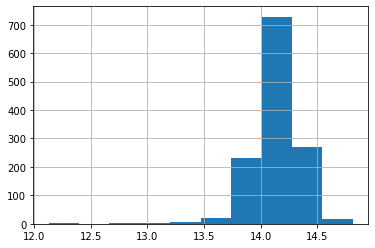

In [220]:
Y.hist()

평가 지표 생성하기

In [7]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def eval_reg(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
  #  print("RMSLE : {0:.3f}, RMSE : {1:.3f}, MAE : {2:,.3f}".format(rmsle_val,rmse_val,mae_val))
    return rmsle_val,rmse_val,mae_val

Linear_Regression 간단하게 생성해보기

In [224]:
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
lgbm_reg = LGBMRegressor(n_estimators=500)
lr_reg = LinearRegression()
model = lgbm_reg


model.fit(X_train,y_train)
pred = model.predict(X_test)

y_test_expm = np.expm1(y_test)
pred_expm = np.expm1(pred)

eval_reg(y_test_expm,pred_expm)

(0.16862348738963037, 231063.75950346416, 170520.35526321945)

In [ ]:
for idx,row in 평가데이터1.iterrows():
    data_행정동1.index[(data_행정동1["일자"] == row["일자"] ) & (data_행정동1["행정동명"] == row[""])]
    
평가데이터1